<a href="https://colab.research.google.com/github/Xebec19/langchain-tutorials/blob/main/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import getpass
import os

os.environ["LANGSMITH_TRACHING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

··········


In [ ]:
%%! pip install -qU "langchain[groq]"
import getpass
import os

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

from langchain.chat_models import init_chat_model

model = init_chat_model("llama3-8b-8192", model_provider="groq")

['/bin/bash: line 1: import: command not found',
 '/bin/bash: line 2: import: command not found',
 "/bin/bash: -c: line 4: syntax error near unexpected token `('",
 '/bin/bash: -c: line 4: `if not os.environ.get("GROQ_API_KEY"):\'']

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage("Translate the following from English into Italian"),
    HumanMessage("hi")
]

model.invoke(messages)

NameError: name 'model' is not defined

In [ ]:
!pip install langchain langchain-community ollama

from langchain_community.llms import Ollama

llm = Ollama(model="deepseek-r1")

response = llm.invoke("What is LangChain?")
print(response)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00


<ipython-input-10-d4d9e409a42d>:5: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="deepseek-r1")


ConnectionError: HTTPConnectionPool(host='localhost', port=11434): Max retries exceeded with url: /api/generate (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7eb182ab37d0>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [2]:
!pip install -U langgraph langsmith langchain-community ollama

from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
  messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [3]:
from langchain_community.llms import Ollama

llm = Ollama(model="deepseek-r1")

def chatbot(state: State):
  return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

<ipython-input-3-a14d631d99c3>:3: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="deepseek-r1")


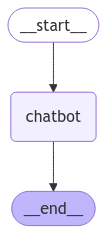

In [4]:
from IPython.display import Image, display

try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [7]:
def stream_graph_updates(user_input: str):
  for event in graph.stream({"messages": [{"role": "user","content": user_input}]}):
    for value in event.values():
      print("Assistant:",value["messages"][-1].content)

while True:
  try:
    user_input = input("User: ")
    if user_input.lower() in ["quit","exit","q"]:
      print("Goodbye!")
      break

    stream_graph_updates(user_input)
  except:
    print("Something went wrong!")
    break

User: hello
Something went wrong!
